# Predicting Rainfall
We will predict if it will be rain tomorrow or not based on today's data.

# 1. <b>Preprocessing<b>


# 1. Configuration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

import os
import joblib
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# 2. Data Import

In [2]:
path_data = "../../data/train/raw/openmeteo/"
paths = []
for root, dirs, files in os.walk(path_data):
    for file in files:
        paths.append(os.path.abspath(root) + "\\" + file)

print(paths)

['c:\\Users\\A\\Documents\\Documents\\Projects\\Python\\Apache Spark ETL\\data\\train\\raw\\openmeteo\\2000\\open-meteo-31.18N72.66E170m.csv', 'c:\\Users\\A\\Documents\\Documents\\Projects\\Python\\Apache Spark ETL\\data\\train\\raw\\openmeteo\\2010\\open-meteo-31.18N72.66E170m.csv', 'c:\\Users\\A\\Documents\\Documents\\Projects\\Python\\Apache Spark ETL\\data\\train\\raw\\openmeteo\\2020\\open-meteo-31.18N72.66E170m.csv', 'c:\\Users\\A\\Documents\\Documents\\Projects\\Python\\Apache Spark ETL\\data\\train\\raw\\openmeteo\\2021\\open-meteo-31.18N72.66E170m.csv', 'c:\\Users\\A\\Documents\\Documents\\Projects\\Python\\Apache Spark ETL\\data\\train\\raw\\openmeteo\\2022\\open-meteo-31.18N72.66E170m.csv', 'c:\\Users\\A\\Documents\\Documents\\Projects\\Python\\Apache Spark ETL\\data\\train\\raw\\openmeteo\\2023\\open-meteo-31.18N72.66E170m.csv', 'c:\\Users\\A\\Documents\\Documents\\Projects\\Python\\Apache Spark ETL\\data\\train\\raw\\openmeteo\\2024\\open-meteo-31.18N72.66E170m.csv']


In [3]:
df = None
df_old = None
for path in paths:
    df = pd.read_csv(path, skiprows=3)
    if df_old is not None:
        df = pd.concat([df, df_old])
    df_old = pd.DataFrame(df)

In [4]:
print(df.shape)
df.describe().T

(219168, 21)


,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),219168.0,24.932582,9.119516,-0.000,17.800,26.300,31.900,47.100
relative_humidity_2m (%),219168.0,56.311359,21.727493,4.000,39.000,56.000,73.000,100.000
dew_point_2m (°C),219168.0,14.108561,7.155405,-16.000,8.600,13.200,20.800,28.900
apparent_temperature (°C),219168.0,25.883923,11.094559,-3.600,16.800,27.100,35.300,50.400
precipitation (mm),219168.0,0.048008,0.362065,0.000,0.000,0.000,0.000,29.600
rain (mm),219168.0,0.048008,0.362065,0.000,0.000,0.000,0.000,29.600
cloud_cover_low (%),219168.0,4.124233,15.022229,0.000,0.000,0.000,0.000,100.000
cloud_cover_mid (%),219168.0,8.165718,17.563633,0.000,0.000,0.000,8.000,100.000
cloud_cover_high (%),219168.0,19.574628,32.576099,0.000,0.000,0.000,26.000,100.000
wind_speed_10m (km/h),219168.0,7.611365,3.474818,0.000,5.400,7.400,9.400,44.100


# 3. Data Cleaning

## 1. Null Values

In [5]:
df.isnull().sum()

time                               0
temperature_2m (°C)                0
relative_humidity_2m (%)           0
dew_point_2m (°C)                  0
apparent_temperature (°C)          0
precipitation (mm)                 0
rain (mm)                          0
cloud_cover_low (%)                0
cloud_cover_mid (%)                0
cloud_cover_high (%)               0
wind_speed_10m (km/h)              0
wind_speed_100m (km/h)             0
wind_direction_10m (°)             0
wind_direction_100m (°)            0
wind_gusts_10m (km/h)              0
soil_temperature_0_to_7cm (°C)     0
soil_temperature_7_to_28cm (°C)    0
soil_moisture_0_to_7cm (m³/m³)     0
soil_moisture_7_to_28cm (m³/m³)    0
et0_fao_evapotranspiration (mm)    0
vapour_pressure_deficit (kPa)      0
dtype: int64

## 2. Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219168 entries, 0 to 87671
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time                             219168 non-null  object 
 1   temperature_2m (°C)              219168 non-null  float64
 2   relative_humidity_2m (%)         219168 non-null  int64  
 3   dew_point_2m (°C)                219168 non-null  float64
 4   apparent_temperature (°C)        219168 non-null  float64
 5   precipitation (mm)               219168 non-null  float64
 6   rain (mm)                        219168 non-null  float64
 7   cloud_cover_low (%)              219168 non-null  int64  
 8   cloud_cover_mid (%)              219168 non-null  int64  
 9   cloud_cover_high (%)             219168 non-null  int64  
 10  wind_speed_10m (km/h)            219168 non-null  float64
 11  wind_speed_100m (km/h)           219168 non-null  float64
 12  wind_dir

In [7]:
df["time"] = pd.to_datetime(df["time"])

## 3. Column names

In [8]:
new_col_names = {}
for col in df.columns:
    new_col_names[col] = col.split(" ")[0]
df = df.rename(columns=new_col_names)
df.columns

Index(['time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'wind_speed_10m',
       'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m',
       'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'et0_fao_evapotranspiration',
       'vapour_pressure_deficit'],
      dtype='object')

## 4. Data Integrity Check

### 1. Imbalanced set

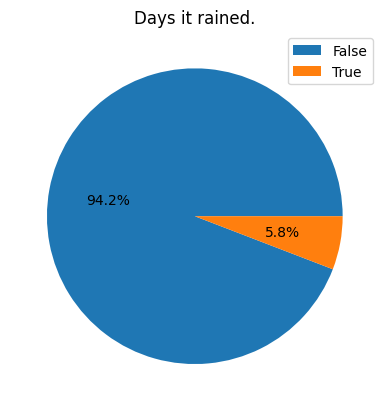

In [9]:
rained = df["rain"] > 0.0

plt.pie(rained.value_counts(), autopct='%1.1f%%')
plt.title("Days it rained.")
plt.legend(rained.value_counts().index)
plt.show()

# 2. <b>Transformations</b>

# 1. Sort by time

In [10]:
df = df.sort_values(by=["time"], ascending=True)

# 2. Get next day rain
Shift/Lag the rain col up by one

In [11]:
df["rain"] = df["rain"].shift(periods=-1, axis="rows")
df = df.iloc[:-1]

# 3. Squeeze data to one row per day

In [12]:
print(df.shape)

df["time"] = df.groupby(df["time"].dt.date)["time"].transform("min")
df = df.groupby("time").mean().reset_index()

df = df.iloc[24:]

print(df.shape)

(219167, 21)
(9108, 21)


# 4. Add Rained or not column

In [13]:
df["rained"] = df["rain"] > 0.0

In [14]:
df["rained"].value_counts()

rained
False    6234
True     2874
Name: count, dtype: int64

# 5. Remove Not Available Columns
Features that are not available in the api should be removed and a new model be trained.

In [15]:
cols = ["soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm",
        "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm"]
df = df.drop(columns=[col for col in cols if col in df.columns])

# 3. <b>EDA</b>
Our first question is: Which features have higher values when there is rain?<br>
Secondly: Did global warming have any major effect on the data because if it did we can only use a portion of the latest data?

# 1. Mean differences

In [16]:
means = pd.DataFrame(df.columns, columns=["feature"])
years = [year for year in range(2000, 2025)]

for year in range(2001, 2025):
    rained = df[df["time"] < datetime(year, 1, 1)]
    rained = rained[rained["rained"] == True]

    not_rained = df[df["time"] < datetime(year, 1, 1)]
    not_rained = not_rained[not_rained["rained"] == False]

    means_temp = pd.DataFrame(rained.drop(columns=["time", "rained"]).mean() - not_rained.drop(columns=["time", "rained"]).mean(), columns=[f"{year}"])
    means_temp = means_temp.reset_index(names=f"feature_{year}")
    
    means = means.merge(means_temp, left_on="feature", right_on=f"feature_{year}")
    means = means.drop(columns=[f"feature_{year}"])

means = means.set_index("feature").T
means.columns.name = None
means = means.reset_index().rename(columns={"index": "year"}).set_index("year").reset_index()
means.head()

,year,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,et0_fao_evapotranspiration,vapour_pressure_deficit
0,2001,3.524428,11.575062,7.010360,6.142895,0.147006,0.147600,6.657130,13.194362,17.552746,0.904574,1.490019,-52.665848,-57.012174,3.926405,0.003076,-0.190389
1,2002,5.110567,10.350472,8.153018,8.170562,0.146207,0.146321,6.907818,12.394473,18.770992,1.012223,1.761421,-46.991635,-52.056715,4.286758,0.016858,-0.033607
2,2003,4.751469,9.537908,7.711823,7.575518,0.136025,0.136308,5.907720,12.228404,17.022168,0.947008,1.741065,-47.586025,-52.089021,4.069968,0.013432,-0.032803
3,2004,4.746994,10.635476,8.167409,7.794026,0.140049,0.140274,6.746122,12.645735,16.122952,0.788390,1.463190,-46.346664,-50.538306,3.854226,0.008487,-0.117276
4,2005,4.474616,10.201202,7.787928,7.383627,0.138194,0.138398,6.849920,12.163947,14.745860,0.826554,1.543972,-46.796147,-51.053274,3.850640,0.007671,-0.125792


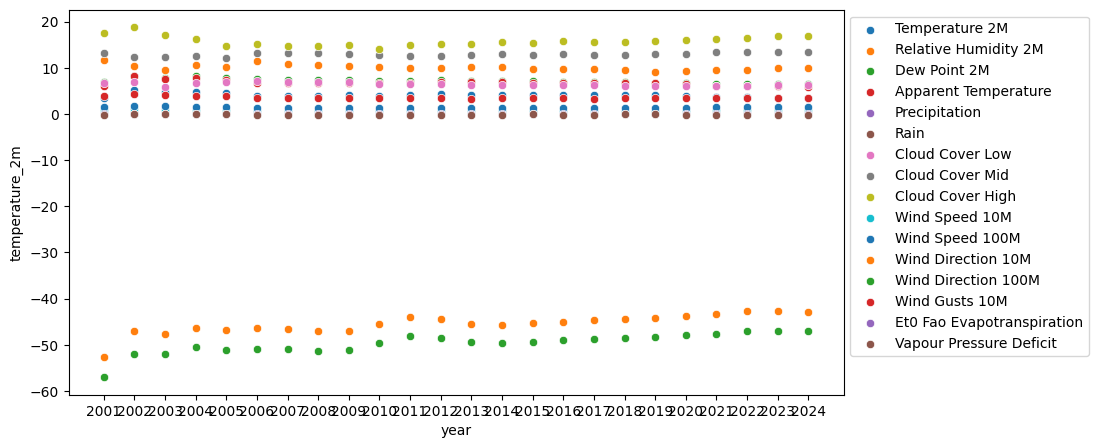

In [17]:
cols = means.columns[1:]

plt.figure(figsize=(10, 5))
for col in cols:
    sns.scatterplot(means, x="year", y=col)
plt.legend(cols.map(lambda c: c.replace("_", " ").title()), bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

means = None

# 2. Variance

The mean difference is just for a general idea, it cannot possibly help us. Specially if the variance of our rainfall data is less than the variance of our non-rainfall data.

In [18]:
rained = df[df["rained"] == True]
not_rained = df[df["rained"] == False]

rained = pd.DataFrame(rained.drop(columns=["time", "rained"]).var(), columns=["rained"]).reset_index().rename(columns={"index": "feature"})
not_rained = pd.DataFrame(not_rained.drop(columns=["time", "rained"]).var(), columns=["not_rained"]).reset_index().rename(columns={"index": "feature"})
vars = rained.merge(not_rained, on="feature")
vars["rain_high_variance"] = vars.apply(lambda row: row["feature"] if row["rained"] > row["not_rained"] else None, axis=1)
print(vars)

rained = None
not_rained = None
vars = None

                       feature       rained   not_rained    rain_high_variance
0               temperature_2m    48.120772    67.845895                  None
1         relative_humidity_2m   248.702450   245.698329  relative_humidity_2m
2                 dew_point_2m    38.145043    41.033384                  None
3         apparent_temperature    82.207931   100.301171                  None
4                precipitation     0.063983     0.000002         precipitation
5                         rain     0.063320     0.000000                  rain
6              cloud_cover_low   168.892906    72.074267       cloud_cover_low
7              cloud_cover_mid   234.877396    58.126907       cloud_cover_mid
8             cloud_cover_high   709.226551   473.315648      cloud_cover_high
9               wind_speed_10m     6.621251     4.605329        wind_speed_10m
10             wind_speed_100m    18.191512    17.866091       wind_speed_100m
11          wind_direction_10m  2705.773598  4511.17

# 3. Distribution

In [19]:
rained = df[df["rained"] == True]
not_rained = df[df["rained"] == False]

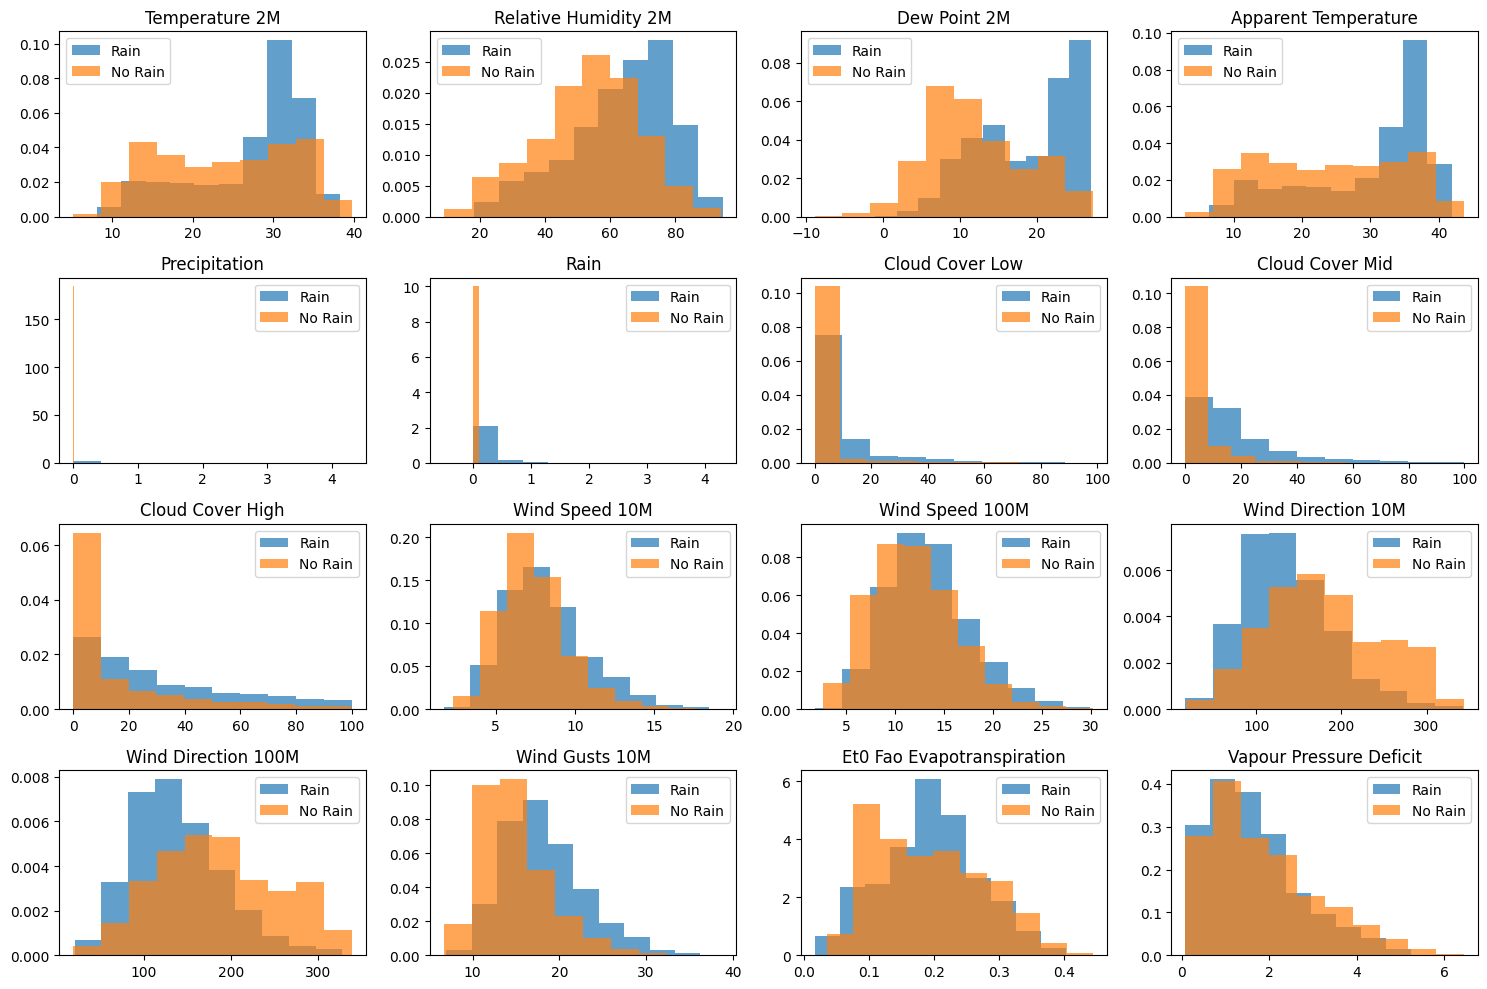

In [20]:
rows = 4
cols = int((len(df.columns) - 1) / rows)
fig, axs = plt.subplots(rows, cols)
fig.set_figwidth(15)
fig.set_figheight(10)

for row in range(rows):
    for col in range(cols):
        idx = 1 + row*cols + col
        axs[row, col].hist(rained[rained.columns[idx]],         density=True, alpha=0.7)
        axs[row, col].hist(not_rained[not_rained.columns[idx]], density=True, alpha=0.7)
        axs[row, col].set_title(not_rained.columns[idx].replace("_", " ").title())
        axs[row, col].legend(["Rain", "No Rain"])
plt.tight_layout()
plt.show()

# 4. Correlations

In [21]:
rained = df[df["rained"] == True].drop(columns=["time"])
not_rained = df[df["rained"] == False].drop(columns=["time"])

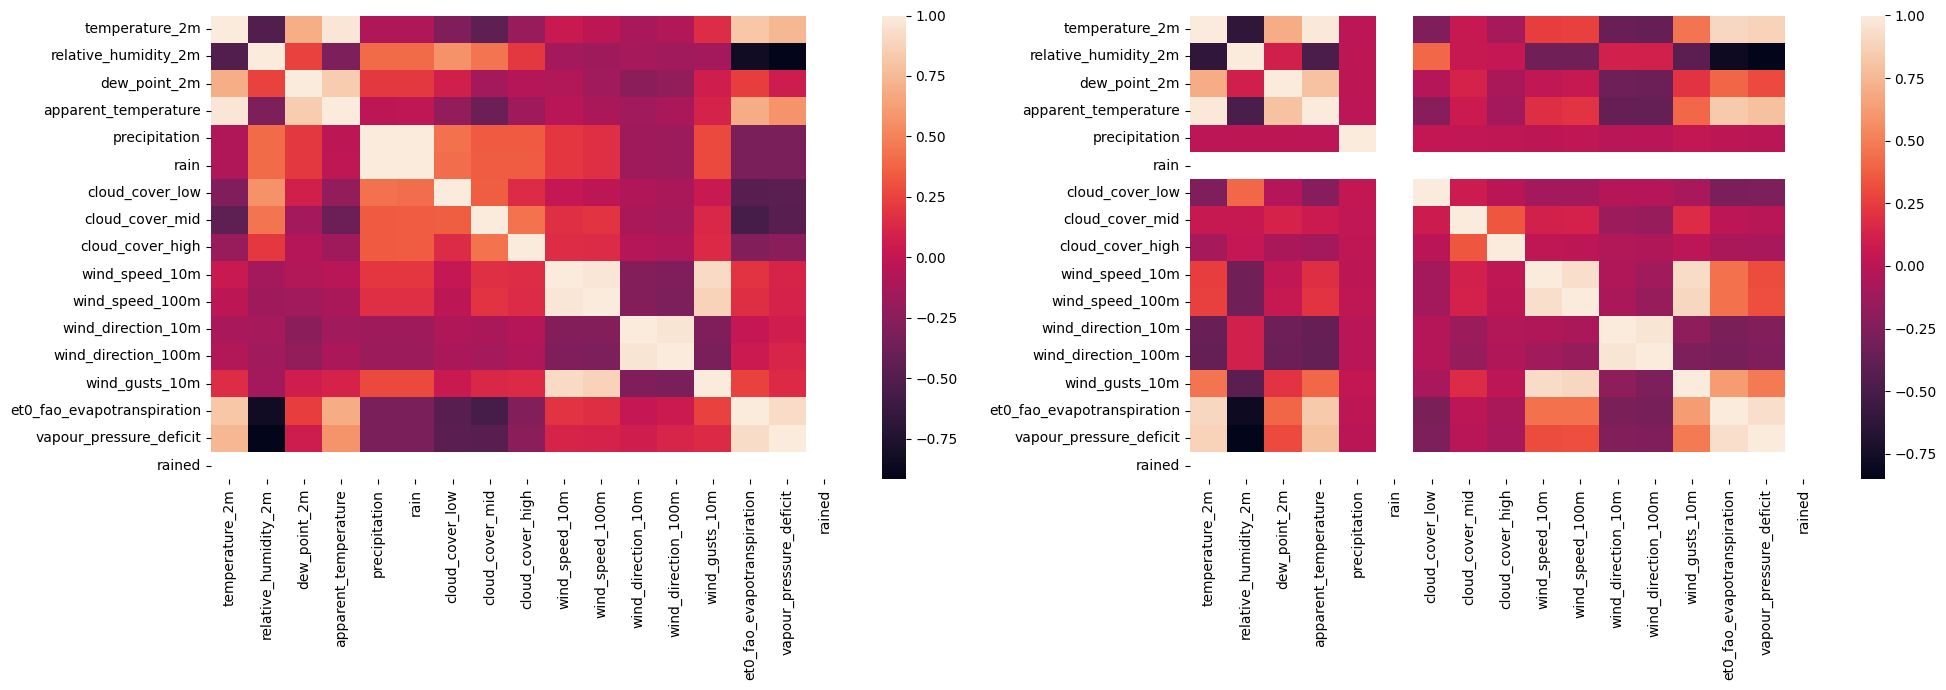

In [22]:
fig, axs = plt.subplots(1, 2)

fig.set_figwidth(20)
fig.set_figheight(7)
sns.heatmap(ax=axs[0], data=rained.corr())
sns.heatmap(ax=axs[1], data=not_rained.corr())
plt.tight_layout()
plt.show()

# 4. <b>ML</b>

# 1. Preprocessing

## 1. Misc

### 1. Convert numeric to classification problem

In [23]:
df_ml = pd.DataFrame(df)

### 2. Drop unecessary columns

In [24]:
df_ml = df_ml.drop(columns=["time", "rain"])

## 2. Train Test Split

In [25]:
X = df_ml.drop(columns=["rained"])
Y = df_ml["rained"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1234)

## 3. Transformations

1. Bootstrapping for minority class (Did rain)

In [26]:
print("Before:")
print("Train:")
print(Y_train.value_counts())
print("Test:")
print(Y_test.value_counts())

ros = RandomOverSampler(sampling_strategy="minority", random_state=1234)
X_train, Y_train = ros.fit_resample(X_train, Y_train)
X_test, Y_test = ros.fit_resample(X_test, Y_test)

print("After:")
print("Train:")
print(Y_train.value_counts())
print("Test:")
print(Y_test.value_counts())

Before:
Train:
rained
False    4987
True     2299
Name: count, dtype: int64
Test:
rained
False    1247
True      575
Name: count, dtype: int64
After:
Train:
rained
False    4987
True     4987
Name: count, dtype: int64
Test:
rained
False    1247
True     1247
Name: count, dtype: int64


In [27]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

print(Y_test.unique())
print(Y_train.unique())

(9974, 15) (2494, 15)
(9974,) (2494,)
[False  True]
[False  True]


2. Standardize

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Training

In [29]:
print(df_ml.shape)
df_ml.head()

(9108, 16)


,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,et0_fao_evapotranspiration,vapour_pressure_deficit,rained
24,13.687500,72.708333,8.695833,12.083333,0.141667,42.958333,34.458333,41.041667,8.858333,16.266667,77.541667,51.041667,19.066667,0.081250,0.455000,True
25,12.079167,80.708333,8.325000,10.570833,0.000000,52.625000,3.000000,0.000000,7.383333,12.087500,109.250000,82.708333,14.804167,0.074167,0.340833,False
26,11.854167,70.666667,5.879167,9.750000,0.000000,2.041667,0.000000,0.000000,8.000000,12.820833,262.125000,266.166667,13.275000,0.106667,0.521250,False
27,12.341667,53.875000,1.987500,9.237500,0.000000,0.000000,0.000000,0.000000,9.762500,17.812500,301.458333,309.041667,16.350000,0.132500,0.815000,False
28,13.366667,52.291667,3.433333,10.741667,0.000000,0.000000,0.000000,6.666667,8.604167,16.037500,260.833333,274.166667,15.370833,0.131250,0.830833,False


## 1. Train

In [30]:
models = [LogisticRegression(), XGBClassifier()]
Y_train_probs = {}
Y_test_probs = {}

Y_train_preds = {}
Y_test_preds = {}

for i in range(len(models)):
    name = models[i].__class__.__name__
    
    print("Training Model:", name)
    models[i].fit(X_train, Y_train)

    Y_train_probs[name] = models[i].predict_proba(X_train)[:, 1]
    Y_test_probs[name] = models[i].predict_proba(X_test)[:, 1]

    Y_train_preds[name] = models[i].predict(X_train)
    Y_test_preds[name] = models[i].predict(X_test)

Training Model: LogisticRegression
Training Model: XGBClassifier


## 2. Performance

### 1. Confusion Matrix

In [31]:
for model in models:
    name = model.__class__.__qualname__

    print("Model:", name)
    print()
    print("Train:")
    print(pd.DataFrame(Y_train_preds[name]).value_counts())
    print()
    print("Test:")
    print(pd.DataFrame(Y_test_preds[name]).value_counts())
    print()
    print()

Model: LogisticRegression

Train:
0    
False    5418
True     4556
Name: count, dtype: int64

Test:
0    
False    1368
True     1126
Name: count, dtype: int64


Model: XGBClassifier

Train:
0
0    4987
1    4987
Name: count, dtype: int64

Test:
0
0    1257
1    1237
Name: count, dtype: int64




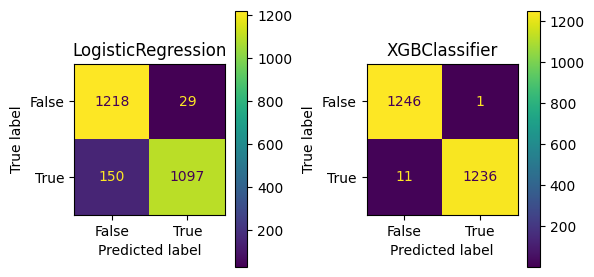

In [32]:
fig, axs = plt.subplots(1, len(models),figsize=(3*len(models), 3))

if len(models) == 1:
    axs = [axs]

for model, ax in zip(models, axs):
    name = model.__class__.__name__
    ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, ax=ax)

    ax.set_title(name)
plt.tight_layout()
plt.show()

### 2. Precision, Recall and F1 scores

In [33]:
for model in models:
    name = model.__class__.__name__
    
    print("Model:", name)
    print(metrics.classification_report(Y_test, Y_test_preds[name]))

Model: LogisticRegression
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      1247
        True       0.97      0.88      0.92      1247

    accuracy                           0.93      2494
   macro avg       0.93      0.93      0.93      2494
weighted avg       0.93      0.93      0.93      2494

Model: XGBClassifier
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      1247
        True       1.00      0.99      1.00      1247

    accuracy                           1.00      2494
   macro avg       1.00      1.00      1.00      2494
weighted avg       1.00      1.00      1.00      2494



### 3. ROC Scores

In [34]:
for model in models:
    name = model.__class__.__name__
    
    print("Model:", name)
    print("Train Accuracy:", metrics.roc_auc_score(Y_train, Y_train_probs[name]))
    print("Test Accuracy:", metrics.roc_auc_score(Y_test, Y_test_probs[name]))
    print()

Model: LogisticRegression
Train Accuracy: 0.9865949041198716
Test Accuracy: 0.9848457468734908

Model: XGBClassifier
Train Accuracy: 1.0
Test Accuracy: 0.9943215762738351



# 3. Predict

# 4. Exporting

In [35]:
path_model = "../../models/rainfall_forecast/"
joblib.dump(models[0], path_model+"open_meteo_classifier.pkl")
joblib.dump(scaler, path_model+"open_meteo_scaler.pkl")

['../../models/rainfall_forecast/open_meteo_scaler.pkl']